In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as prf
from sklearn.metrics import mean_absolute_error

In [24]:
train = pd.read_csv('train.csv', sep=' ')
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [7]:
pfr = prf.ProfileReport(train, minimal=True)

build report structure: 100%|██████████| 1/1 [00:25<00:00, 25.56s/it]


In [10]:
pfr.to_notebook_iframe()

In [4]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
    """
    start_mem = df.memory_usage().sum()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem/(1024*1024)))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum()
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem/(1024*1024)))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [26]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 35.48 MB
Memory usage after optimization is: 9.73 MB
Decreased by 72.6%


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int32
name                 150000 non-null int32
regDate              150000 non-null int32
model                149999 non-null float16
brand                150000 non-null int8
bodyType             145494 non-null float16
fuelType             141320 non-null float16
gearbox              144019 non-null float16
power                150000 non-null int16
kilometer            150000 non-null float16
notRepairedDamage    150000 non-null category
regionCode           150000 non-null int16
seller               150000 non-null int8
offerType            150000 non-null int8
creatDate            150000 non-null int32
price                150000 non-null int32
v_0                  150000 non-null float16
v_1                  150000 non-null float16
v_2                  150000 non-null float16
v_3                  150000 non-null float16
v_4        

In [7]:
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235718,0.101990,0.129517,0.022812,0.097473,-2.880859,2.804688,-2.419922,0.795410,0.914551
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264893,0.121033,0.135742,0.026596,0.020584,-4.902344,2.095703,-1.030273,-1.722656,0.245483
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251465,0.114929,0.165161,0.062164,0.027069,-4.847656,1.803711,1.565430,-0.832520,-0.229980
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274414,0.110291,0.121948,0.033386,0.000000,-4.507812,1.286133,-0.501953,-2.437500,-0.478760
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228027,0.073181,0.091858,0.078796,0.121521,-1.896484,0.910645,0.931152,2.833984,1.923828


In [13]:
continuous_feature_names = [x for x in train.columns if x not in ['price','brand','model','brand']]
continuous_feature_names

['SaleID',
 'name',
 'regDate',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'regionCode',
 'seller',
 'offerType',
 'creatDate',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [29]:
sample_feature = train.dropna().replace('-', 0).reset_index(drop=True) # dropna 只要有一个null就删除，how参数可以设置any默认或all
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)
train_data = sample_feature[continuous_feature_names + ['price']]

In [31]:
train_data.head()

,SaleID,name,regDate,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
0,0,736,20040402,1.0,0.0,0.0,60,12.5,0.0,1046,...,0.101990,0.129517,0.022812,0.097473,-2.880859,2.804688,-2.419922,0.795410,0.914551,1850
1,1,2262,20030301,2.0,0.0,0.0,0,15.0,0.0,4366,...,0.121033,0.135742,0.026596,0.020584,-4.902344,2.095703,-1.030273,-1.722656,0.245483,3600
2,2,14874,20040403,1.0,0.0,0.0,163,12.5,0.0,2806,...,0.114929,0.165161,0.062164,0.027069,-4.847656,1.803711,1.565430,-0.832520,-0.229980,6222
3,3,71865,19960908,0.0,0.0,1.0,193,15.0,0.0,434,...,0.110291,0.121948,0.033386,0.000000,-4.507812,1.286133,-0.501953,-2.437500,-0.478760,2400
4,4,111080,20120103,1.0,0.0,0.0,68,5.0,0.0,6977,...,0.073181,0.091858,0.078796,0.121521,-1.896484,0.910645,0.931152,2.833984,1.923828,5200


In [35]:
train_X = train_data[continuous_feature_names]
train_y = train_data['price']

In [33]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression(normalize=True)
model = model.fit(train_X, train_y)

## 查看训练的线性回归模型的截距（intercept）与权重(coef)

In [37]:
'intercept:'+ str(model.intercept_)

'intercept:-4640457.866189687'

In [38]:
model.coef_

array([-9.32424186e-05, -2.98807529e-05, -5.48316627e-03,  1.97947565e+02,
       -1.59348489e+02,  1.57186326e+03,  2.04243906e+00, -3.06306822e+02,
       -1.25416221e+02,  6.70572776e-02, -2.69964398e+02, -2.34767795e-05,
        2.34274715e-01, -4.47505785e+03, -1.77913896e+04, -1.31259793e+05,
        8.42356553e+04, -4.46497423e+04, -3.17159330e+04,  3.67300214e+06,
        5.25243164e+04,  7.59591700e+05,  4.71323043e+05,  4.32765905e+04,
        5.34112846e+04,  1.32283376e+05,  3.93301881e+04, -1.59305082e+03])

In [39]:
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

[('v_6', 3673002.141938412),
 ('v_8', 759591.7003447219),
 ('v_9', 471323.04315034056),
 ('v_12', 132283.37624415205),
 ('v_3', 84235.65527098416),
 ('v_11', 53411.28459388135),
 ('v_7', 52524.316439718794),
 ('v_10', 43276.590469781666),
 ('v_13', 39330.18806940478),
 ('gearbox', 1571.8632628214657),
 ('bodyType', 197.9475654125328),
 ('power', 2.0424390558417667),
 ('creatDate', 0.23427471450545798),
 ('regionCode', 0.06705727763304414),
 ('offerType', -2.3476779460906982e-05),
 ('name', -2.9880752941101264e-05),
 ('SaleID', -9.324241864683627e-05),
 ('regDate', -0.005483166270676542),
 ('notRepairedDamage', -125.41622147342768),
 ('fuelType', -159.3484889309074),
 ('seller', -269.9643979005123),
 ('kilometer', -306.306822292009),
 ('v_14', -1593.0508199085739),
 ('v_0', -4475.057851914876),
 ('v_1', -17791.389561702395),
 ('v_5', -31715.933007691714),
 ('v_4', -44649.74228738536),
 ('v_2', -131259.7933339914)]

In [40]:
subsample_index = np.random.randint(low=0, high=len(train_y), size=50)

### 绘制特征v_9的值与标签的散点图，图片发现模型的预测结果（蓝色点）与真实标签（黑色点）的分布差异较大，且部分预测值出现了小于0的情况，说明我们的模型存在一些问题

The predicted price is obvious different from true price


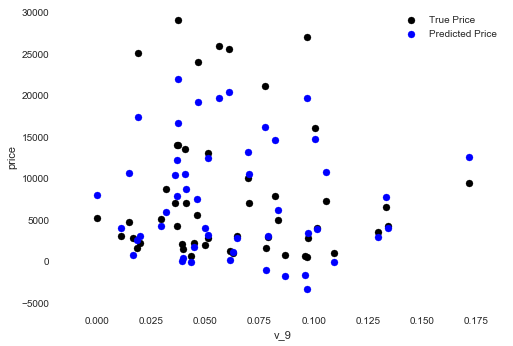

In [41]:
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], model.predict(train_X.iloc[subsample_index]), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price is obvious different from true price')
plt.show()

In [55]:
mean_absolute_error(train_y, model.predict(train_X))

2600.0613601070972

### 通过作图我们发现数据的标签（price）呈现长尾分布，不利于我们的建模预测。原因是很多模型都假设数据误差项符合正态分布，而长尾分布的数据违背了这一假设。

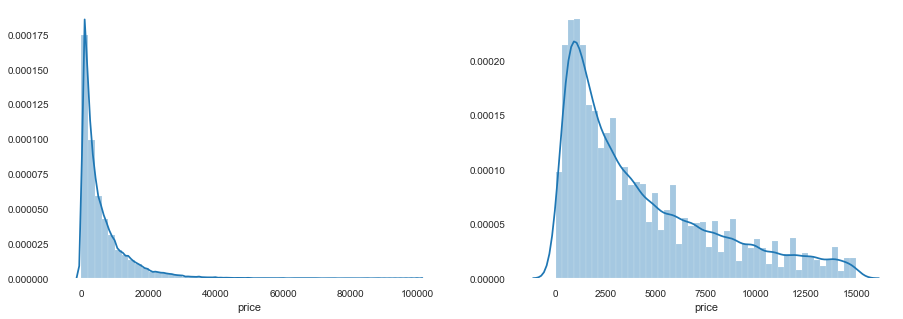

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y)
plt.subplot(1,2,2)
sns.distplot(train_y[train_y < np.quantile(train_y, 0.9)])

### 在这里我们对标签进行了log(x+1)变换，使标签贴近于正态分布?

In [44]:
train_y_ln = np.log(train_y + 1)

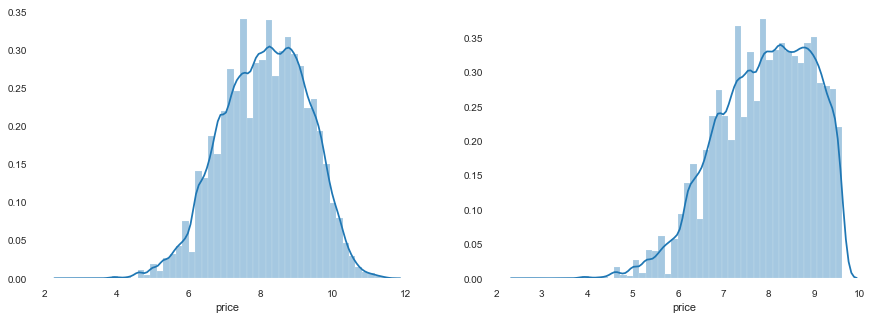

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln, 0.9)])

In [57]:
model = model.fit(train_X, train_y_ln)

print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:-353.38896817615677


[('v_5', 16.0906569492673),
 ('v_9', 11.972612801935202),
 ('v_7', 2.641441554686322),
 ('v_1', 2.059787711492495),
 ('v_12', 1.4249747322604709),
 ('v_13', 1.194807354485189),
 ('v_3', 0.7763099340040008),
 ('v_11', 0.14195738474475617),
 ('gearbox', 0.04646668788565959),
 ('power', 8.233335079432977e-05),
 ('creatDate', 1.8709995340917234e-05),
 ('SaleID', 4.655766772245532e-09),
 ('offerType', -2.0241941456333734e-10),
 ('name', -6.1043669284539e-08),
 ('regDate', -2.5161429374048385e-07),
 ('regionCode', -1.0033569518178827e-06),
 ('bodyType', -0.0006192852761672904),
 ('fuelType', -0.004586532008358827),
 ('kilometer', -0.008325123062295001),
 ('v_14', -0.024877554391268),
 ('v_0', -0.10964201577670066),
 ('seller', -0.11027663559429228),
 ('notRepairedDamage', -0.2408582547610638),
 ('v_2', -0.31056631330688655),
 ('v_10', -0.7417529879248947),
 ('v_4', -1.1094649651534974),
 ('v_8', -34.756613415437805),
 ('v_6', -194.4918894990469)]

The predicted price seems normal after np.log transforming


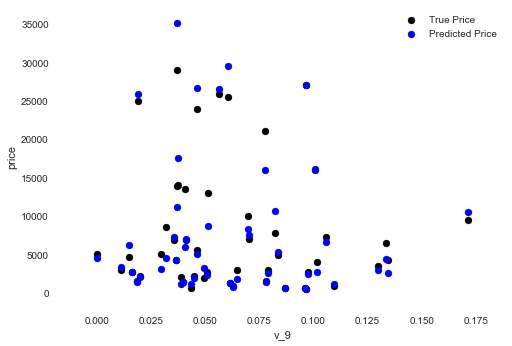

In [60]:
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], np.exp(model.predict(train_X.iloc[subsample_index])), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()

In [69]:
mean_absolute_error(train_y, np.exp(model.predict(train_X))-1)

987.627394870536

In [71]:
test = pd.read_csv('test1.csv', sep=' ')
test.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


In [73]:
cols = train_X.columns

In [75]:
test1 = test[cols]
test1.head()

,SaleID,name,regDate,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,5.0,1.0,1.0,313,15.0,0.0,1440,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,0.0,0.0,0.0,75,12.5,1.0,5419,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,0.0,0.0,0.0,109,7.0,0.0,5045,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0.0,1.0,160,7.0,0.0,4023,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,2.0,0.0,0.0,75,15.0,0.0,3103,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


In [81]:
test1 = test1.replace('-', 0)
test1 = test1.fillna(0)

In [82]:
sub_Weighted = np.exp(model.predict(test1))-1

In [84]:
sub = pd.DataFrame()
sub['SaleID'] = test1.SaleID
sub['price'] = sub_Weighted
sub.to_csv('./sub_Weighted.csv',index=False)

In [85]:
sub.describe()

,SaleID,price
count,50000.000000,50000.000000
mean,174999.500000,5796.241391
std,14433.901067,7378.549335
min,150000.000000,5.127821
25%,162499.750000,1320.940579
50%,174999.500000,3031.023979
75%,187499.250000,7446.167025
max,199999.000000,99181.475173


In [86]:
train_y.describe()

count    135884.000000
mean       6217.615775
std        7627.659649
min          13.000000
25%        1450.000000
50%        3500.000000
75%        8000.000000
max       99999.000000
Name: price, dtype: float64